In [2]:
!pip install tensorflow

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import datasets, models, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
df = datasets.cifar10.load_data()
df

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [67]:
(X_train, y_train), (X_test, y_test) = df

In [68]:
X_train.shape

(50000, 32, 32, 3)

In [69]:
X_test.shape

(10000, 32, 32, 3)

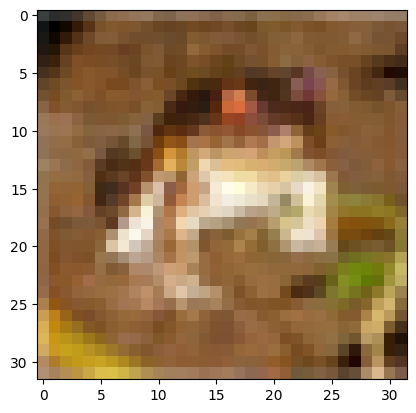

In [70]:
plt.imshow(X_train[0])

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [71]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [72]:
description = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

description[7]

'horse'

In [74]:
def plot_img(X, y, index):
  plt.figure(figsize=(6,6))
  plt.imshow(X[index])
  plt.xlabel(description[y[index]])


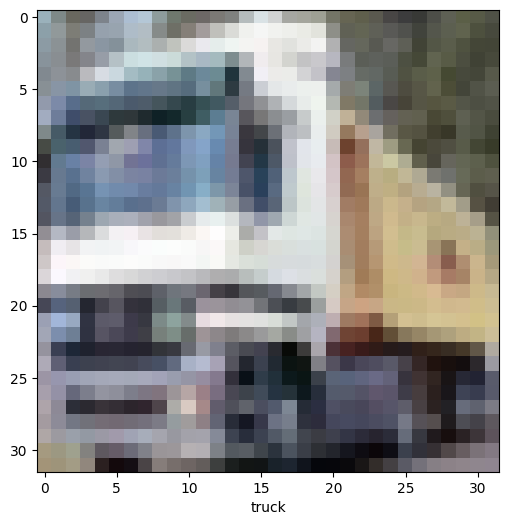

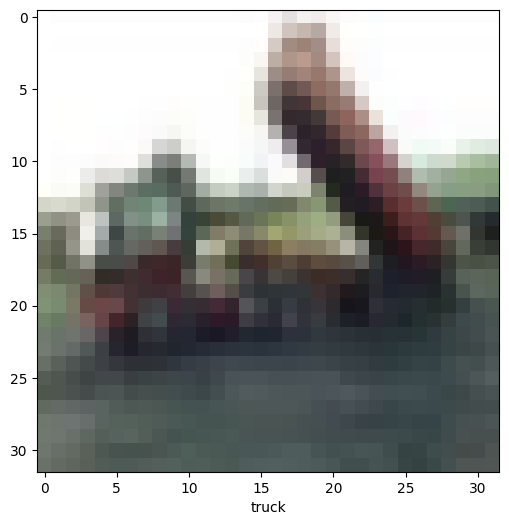

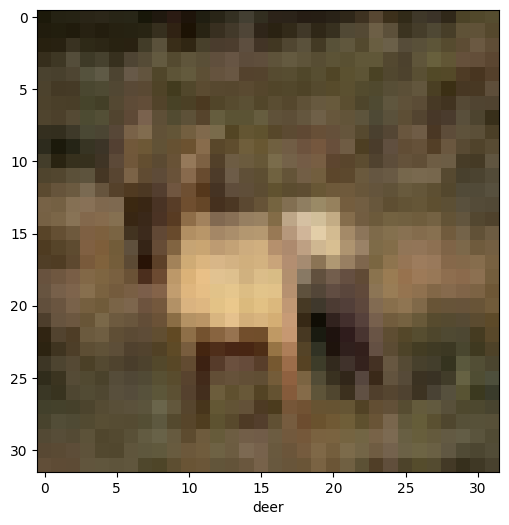

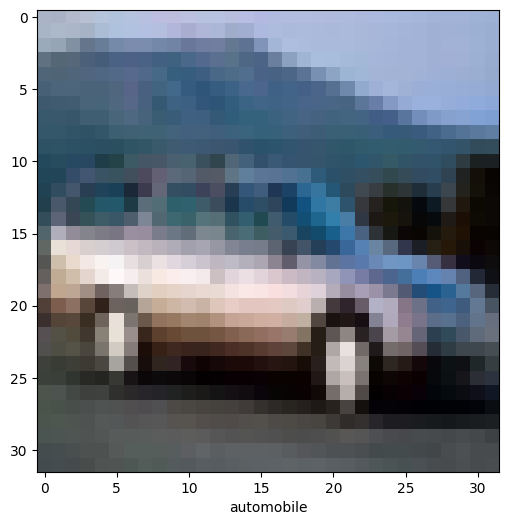

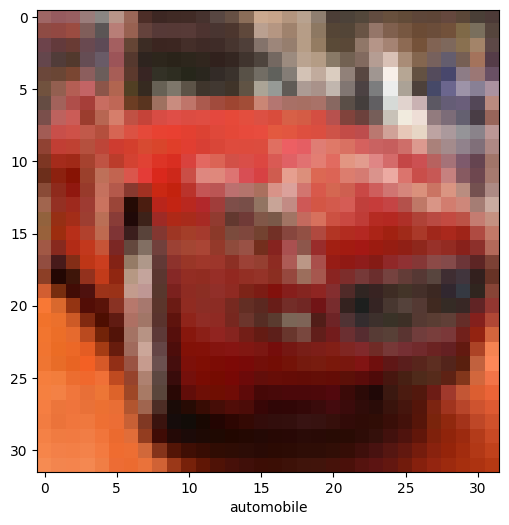

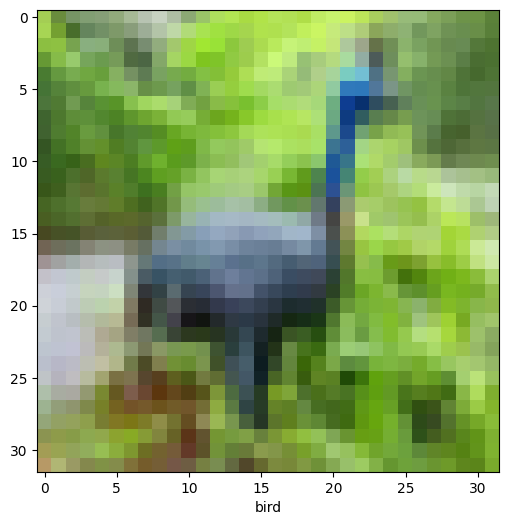

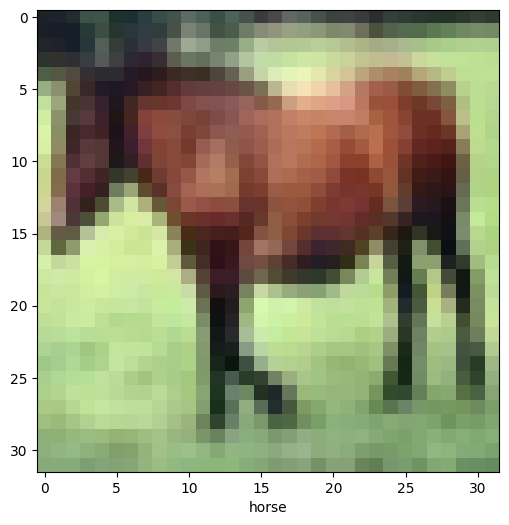

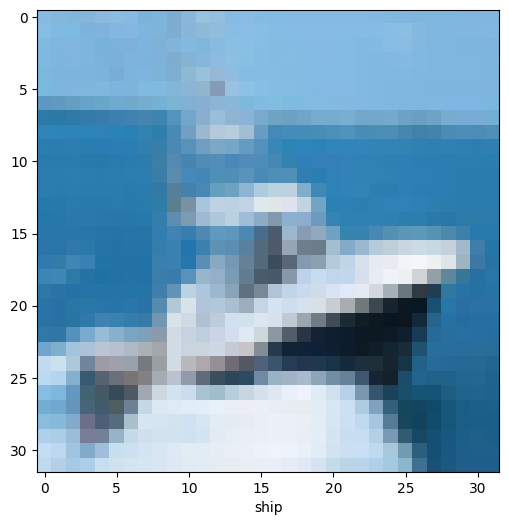

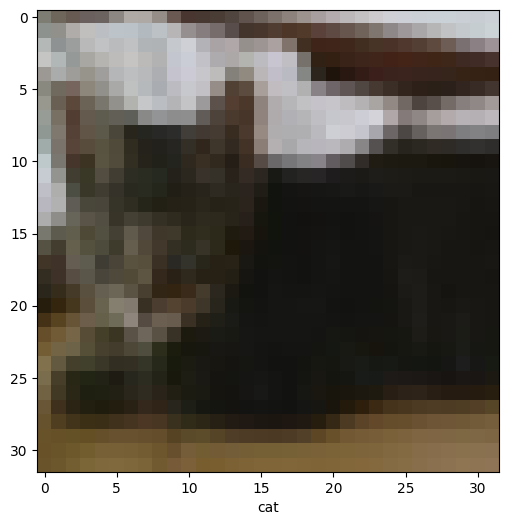

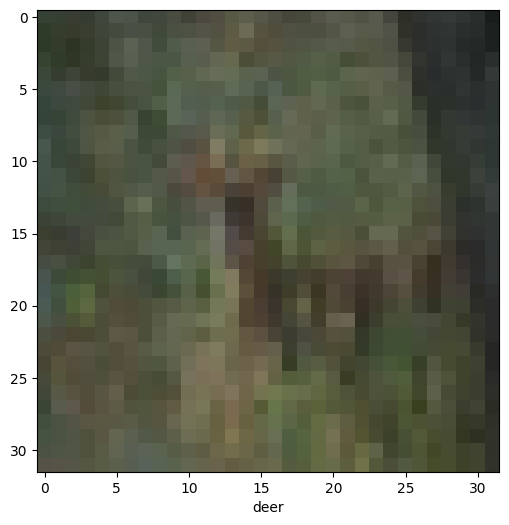

In [75]:
for i in range(1, 11):
  plot_img(X_train, y_train, i)

In [25]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [76]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [77]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [78]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [79]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [80]:
ann = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')
    ]
)

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 97ms/step - accuracy: 0.3054 - loss: 1.9359
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 94ms/step - accuracy: 0.4176 - loss: 1.6463
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.4495 - loss: 1.5611
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 94ms/step - accuracy: 0.4743 - loss: 1.4886
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 108ms/step - accuracy: 0.4905 - loss: 1.4467


In [82]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4937 - loss: 1.4478


[1.45294189453125, 0.4880000054836273]

In [90]:
y_pred = ann.predict(X_test)
y_pred_description = [np.argmax(i) for i in y_pred]
print("Classification Report {} Classes {}".format(classification_report(y_test, y_pred_description), desc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
Classification Report               precision    recall  f1-score   support

           0       0.55      0.58      0.56      1000
           1       0.51      0.75      0.61      1000
           2       0.32      0.48      0.38      1000
           3       0.39      0.30      0.34      1000
           4       0.45      0.33      0.38      1000
           5       0.57      0.20      0.30      1000
           6       0.47      0.64      0.54      1000
           7       0.58      0.51      0.54      1000
           8       0.66      0.56      0.61      1000
           9       0.54      0.51      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000
 Classes ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [91]:
cnn = models.Sequential(
    [
        #CNN
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        #Dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 46ms/step - accuracy: 0.3792 - loss: 1.6984
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.5900 - loss: 1.1616
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6444 - loss: 1.0130


In [92]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6599 - loss: 0.9670


[0.9769741892814636, 0.6607000231742859]

In [59]:
X_test.shape

(50000,)

In [61]:
y_test.shape

(10000,)

In [62]:
y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

In [93]:
y_pred = cnn.predict(X_test)
y_pred_description = [np.argmax(i) for i in y_pred]
print("Classification Report {}".format(classification_report(y_test, y_pred_description)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report               precision    recall  f1-score   support

           0       0.66      0.72      0.69      1000
           1       0.79      0.76      0.78      1000
           2       0.53      0.51      0.52      1000
           3       0.55      0.40      0.46      1000
           4       0.59      0.66      0.62      1000
           5       0.59      0.53      0.56      1000
           6       0.78      0.73      0.76      1000
           7       0.70      0.72      0.71      1000
           8       0.71      0.80      0.75      1000
           9       0.67      0.78      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [95]:
y_pred[:5]

array([[3.3435732e-02, 6.6268508e-04, 1.6989810e-02, 6.3628906e-01,
        3.2255508e-03, 1.4592370e-01, 3.4705218e-02, 1.2521290e-03,
        1.2246282e-01, 5.0533125e-03],
       [1.1956547e-02, 1.3103221e-01, 4.6212575e-05, 1.2813350e-05,
        7.8556288e-05, 1.5965104e-06, 7.0752890e-07, 1.9379935e-05,
        8.1747419e-01, 3.9377723e-02],
       [2.2037571e-02, 1.8269095e-01, 2.1939515e-03, 6.3476674e-03,
        3.2736701e-03, 8.8462635e-04, 4.4217627e-04, 7.2552537e-04,
        6.9276148e-01, 8.8642329e-02],
       [4.2944518e-01, 5.1726308e-02, 7.3369346e-03, 1.8995628e-03,
        9.9425213e-03, 3.3349050e-05, 5.4149539e-04, 6.6386354e-05,
        4.9183872e-01, 7.1694902e-03],
       [8.5675827e-05, 3.8357477e-05, 7.6755388e-03, 1.5320212e-02,
        6.6546285e-01, 6.0031237e-03, 3.0513212e-01, 2.0143185e-04,
        6.8746354e-05, 1.1855256e-05]], dtype=float32)

In [96]:
y_pred_description[:5]

[3, 8, 8, 8, 4]

In [98]:
y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

In [99]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

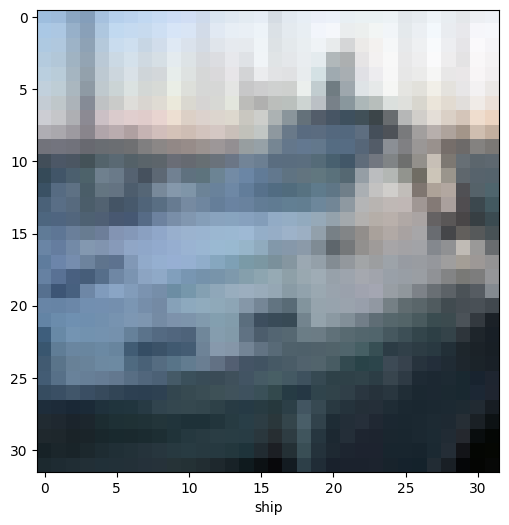

In [107]:
plot_img(X_test, y_test, 2)

In [108]:
description[y_pred_description[2]]

'ship'